Keterangan: Yang paling bagus ada di Decision Tree, Random Forest sama XGBoost

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

_ = sns.set_palette('Set2')

In [49]:
import joblib

feature = joblib.load('../dataset/feature')
target = joblib.load('../dataset/target')

# Estimating performance for the model(s)

In [47]:
from sklearn.model_selection import RepeatedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

cv = RepeatedKFold(n_splits=3, n_repeats=2)

# max_depth=i, max_features='auto', min_samples_split=i, min_samples_leaf=i, min_impurity_decrease=i

param_grid = {
    'max_depth': [2, 8, 10, 20,50, 100, 150, 250, 300 ,500, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [2, 8, 10, 20,50, 100, 150, 250, 300 ,500, 1000],
    'min_samples_split': [2, 8, 10, 20,50, 100, 150, 250, 300 ,500, 1000],
}

models = DecisionTreeClassifier()

# scoring = ['accuracy', 'precision', 'recall', 'f1']
scoring = 'f1'

grid = GridSearchCV(models, param_grid, cv=cv, scoring=scoring)
grid.fit(feature, target)

grid.best_estimator_

DecisionTreeClassifier(max_depth=250, max_features='auto', min_samples_leaf=2)

In [ ]:
from sklearn.model_selection import cross_validate, RepeatedKFold
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

cv = RepeatedKFold(n_splits=10, n_repeats=2)

models = {
    "DT": DecisionTreeClassifier(),
    'RF': RandomForestClassifier(),
    'XGB': XGBClassifier(use_label_encoder=False)
}

# max_depth=i, max_features='auto', min_samples_split=i, min_samples_leaf=i, min_impurity_decrease=i

names = []
scoring = ['accuracy', 'precision', 'recall', 'f1']
accuracy, precision, recall, f1 = [[] for i in range(len(scoring))]

for name, model in models.items():
    names.append(name)

    scores = cross_validate(model, feature, target, cv=cv, scoring=scoring)

    accuracy.append(scores['test_accuracy'].mean())
    precision.append(scores['test_precision'].mean())
    recall.append(scores['test_recall'].mean())
    f1.append(scores['test_f1'].mean())

In [61]:
results_df = pd.DataFrame({
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1': f1,
}, index=names).sort_values(by='Accuracy', ascending=True)

results_df.sort_values(by='Accuracy', ascending=False)

,Accuracy,Precision,Recall,F1
RF,0.851442,0.862072,0.836561,0.848876
XGB,0.818215,0.793106,0.861304,0.825526
DT,0.777533,0.734715,0.869221,0.795822


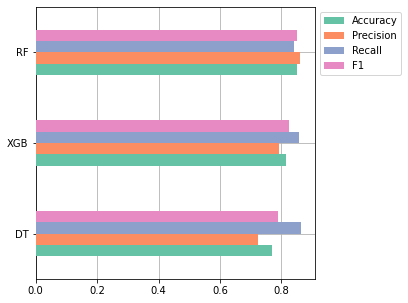

In [8]:
_, ax = plt.subplots(figsize=(5,5))
results_df.plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

In [64]:
models = {
    "decision_tree": DecisionTreeClassifier(),
    'random_forest': RandomForestClassifier(),
    'xgboost': XGBClassifier(use_label_encoder=False)
}

for name, model in models.items():

    model.fit(feature, target)

    joblib.dump(model, f'../model/{name}')

[22:56:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [18]:
import numpy as np
import joblib

_model = joblib.load('../model/decision_tree')
result = _model.predict(np.array([1,2,3,4,5,6,7,8,9]).reshape(1,-1))
print(result)

[1]


In [23]:
test = {
    'a':1,
    'b':2,
    'c':3,
    'd':4,
    'e':5,
    'f':6,
    'g':7,
    'h':8,
    'i':9
}

tests = np.array(list(test.values()))

_model = joblib.load('../model/decision_tree')
result = _model.predict(tests.reshape(1,-1))
print(result)

[1]


In [24]:
result[0]

1